
This week's assignment asks you to test a basic linear regression model for the association between your primary explanatory variable and a response variable, and to create a blog entry describing your results.


<strong>Data preparation for this assignment:</strong>


<ol>
<li>If your explanatory variable is categorical with more than two categories, you will need to collapse it down to two categories, or subset your data to select observations from 2 categories (next week you'll learn how to analyze categorical explanatory variable with more than 2 categories).</li>
<li>If your response variable is categorical, you will need to identify a quantitative variable in the data set that you can use as a response variable for this assignment. Variables with response scales with 4-5 values that represent a change in magnitude (for example, "strongly disagree to strongly agree", "never to often") can be considered quantitative for the assignment.</li>
</ol>


<strong>The assignment:</strong>


<ol>
<li>If you have a categorical explanatory variable, make sure one of your categories is coded "0" and generate a frequency table for this variable to check your coding. If you have a quantitative explanatory variable, center it so that the mean = 0 (or really close to 0) by subtracting the mean, and then calculate the mean to check your centering.</li>
<li>Test a linear regression model and summarize the results in a couple of sentences. Make sure to include statistical results (regression coefficients and p-values) in your summary.</li>
</ol>


<strong>WHAT TO SUBMIT:</strong>


Create a blog entry where you
<ol>
<li>post your program and output, and</li>
<li>post a frequency table for your (recoded) categorical explanatory variable or report the mean for your centered explanatory variable.</li>
<li>Write a few sentences describing the results of your linear regression analysis.</li>
</ol>


### Review criteria


Your assessment will be based on the evidence you
provide that you have completed all of the steps.
When relevant, gradients in the scoring will be
available to reward clarity (for example, you will get
one point for submitting an incomplete or inaccurate summary of results, but two points if the summary of results is complete and accurate). In all cases, consider that
the peer assessing your work is likely not an expert
in the field you are analyzing. You will be assessed
equally on your description of your frequency
distributions.


### Example of how to write results for linear regression


The results of the linear regression model indicated that major depression (Beta=1.34, p=.0001) was significantly and positively associated with number of nicotine dependence symptoms.

In [15]:
# %load ../../../load_magic/storage.py

import pickle
import pandas as pd
import os

# Change this to your data and saves folders
data_folder = r'../../data/'
saves_folder = r'../../saves/'

# Create the assumed directories
os.makedirs(name=data_folder+'csv', exist_ok=True)
os.makedirs(name=saves_folder+'pickle', exist_ok=True)
os.makedirs(name=saves_folder+'csv', exist_ok=True)

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][2]

def load_csv(csv_name=None, folder_path=None):
    if folder_path is None:
        csv_folder = data_folder + 'csv/'
    else:
        csv_folder = folder_path + 'csv/'
    if csv_name is None:
        csv_path = max([os.path.join(csv_folder, f) for f in os.listdir(csv_folder)],
                       key=os.path.getmtime)
    else:
        csv_path = csv_folder + csv_name + '.csv'
    data_frame = pd.read_csv(csv_path, encoding=encoding)
    
    return(data_frame)

def load_dataframes(**kwargs):
    frame_dict = {}
    for frame_name in kwargs:
        pickle_path = saves_folder + 'pickle/' + frame_name + '.pickle'
        if not os.path.isfile(pickle_path):
            print('No pickle exists at ' + pickle_path + ' - attempting to load a saves folder csv.')
            csv_folder = saves_folder + 'csv/'
            csv_path = csv_folder + frame_name + '.csv'
            if not os.path.isfile(csv_path):
                print('No csv exists at ' + csv_path + ' - trying the data folder.')
                csv_path = data_folder + 'csv/' + frame_name + '.csv'
                if not os.path.isfile(csv_path):
                    print('No csv exists at ' + csv_path + ' - just forget it.')
                    frame_dict[frame_name] = None
                else:
                    frame_dict[frame_name] = load_csv(csv_name=frame_name)
            else:
                frame_dict[frame_name] = load_csv(csv_name=frame_name, folder_path=csv_folder)
        else:
            frame_dict[frame_name] = load_object(frame_name)
    
    return frame_dict

def load_object(obj_name, download_url=None):
    pickle_path = saves_folder + 'pickle/' + obj_name + '.pickle'
    if not os.path.isfile(pickle_path):
        print('No pickle exists at ' + pickle_path + ' - attempting to load as csv.')
        csv_path = saves_folder + 'csv/' + obj_name + '.csv'
        if not os.path.isfile(csv_path):
            print('No csv exists at ' + csv_path + ' - attempting to download from URL.')
            object = pd.read_csv(download_url, low_memory=False,
                                 encoding=encoding)
        else:
            object = pd.read_csv(csv_path, low_memory=False,
                                 encoding=encoding)
        if isinstance(object, pd.DataFrame):
            attempt_to_pickle(object, pickle_path, raise_exception=False)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(object, handle, pickle.HIGHEST_PROTOCOL)
    else:
        try:
            object = pd.read_pickle(pickle_path)
        except:
            with open(pickle_path, 'rb') as handle:
                object = pickle.load(handle)
    
    return(object)

def save_dataframes(include_index=False, **kwargs):
    csv_folder = saves_folder + 'csv/'
    for frame_name in kwargs:
        if isinstance(kwargs[frame_name], pd.DataFrame):
            csv_path = csv_folder + frame_name + '.csv'
            kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding,
                                      index=include_index)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = saves_folder + 'pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            attempt_to_pickle(kwargs[obj_name], pickle_path, raise_exception=False)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

def attempt_to_pickle(df, pickle_path, raise_exception=False):
    try:
        print('Pickling to ' + pickle_path)
        df.to_pickle(pickle_path)
    except Exception as e:
        os.remove(pickle_path)
        print(e, ': Couldn\'t save ' + '{:,}'.format(df.shape[0]*df.shape[1]) + ' cells as a pickle.')
        if raise_exception:
            raise

In [19]:

encoding = ['latin1', 'iso8859-1', 'utf-8'][1]
gapminder_df = load_object('gapminder')

In [24]:

elite_df = gapminder_df.dropna()
elite_df.sample(n=7).T

,204,85,243,156,44,194,67
COUNTRY,Russia,France,Switzerland,Mexico,Chile,Poland,Ecuador
INCOMEPERPERSON,2923.14,22878.5,37662.8,6105.28,6334.11,6575.75,1728.02
ALCCONSUMPTION,16.23,12.48,11.41,8.55,8.81,14.43,9.43
ARMEDFORCESRATE,1.94145,1.23378,0.52422,0.61234,1.34111,0.810187,1.01795
BREASTCANCERPER100TH,38.8,91.9,81.7,26.4,43.9,50.3,23.5
CO2EMISSIONS,2.34046e+10,3.33416e+10,2.40674e+09,1.33045e+10,1.83947e+09,2.30536e+10,6.92039e+08
FEMALEEMPLOYRATE,53.8,45.6,57,39.6,35.5,42.1,45.5
HIVRATE,1,0.4,0.4,0.3,0.4,0.1,0.4
INTERNETUSERATE,43.3665,77.4986,82.1667,31.05,45,62.4712,28.9995
LIFEEXPECTANCY,68.823,81.539,82.338,76.954,79.12,76.126,75.632


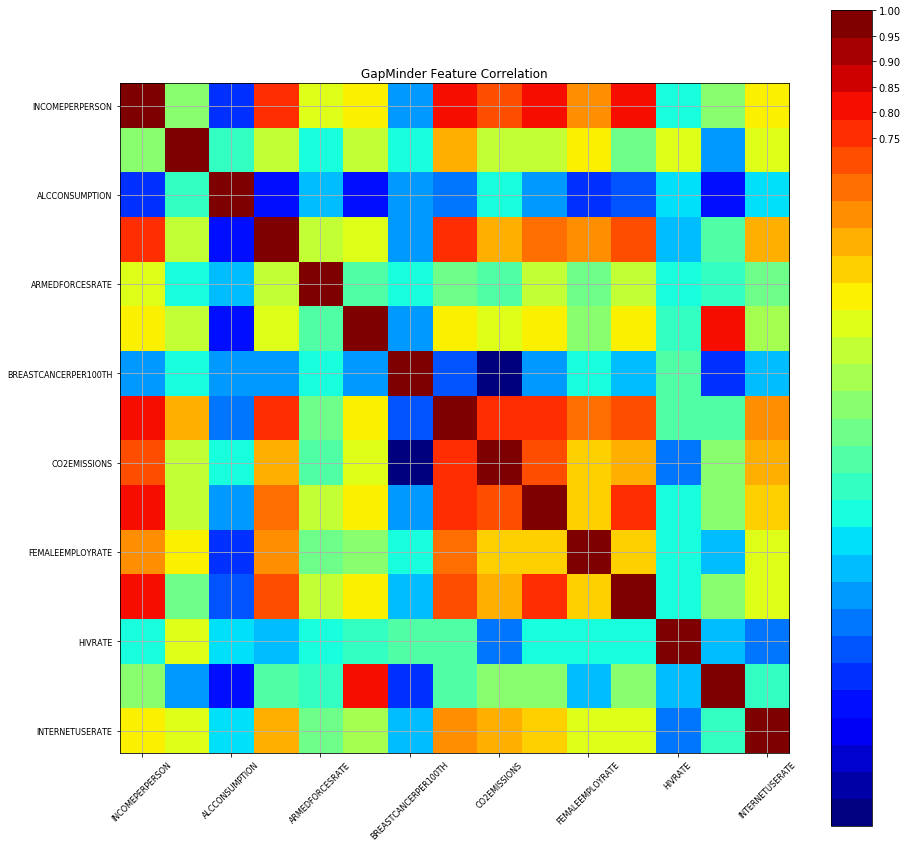

In [30]:

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def correlation_matrix(df):

    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('GapMinder Feature Correlation')
    ax1.set_xticklabels(df.columns, fontsize=8, rotation=45)
    ax1.set_yticklabels(df.columns, fontsize=8)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75, .8, .85, .90, .95, 1])

correlation_matrix(elite_df)

In [31]:

elite_df.corr()

,INCOMEPERPERSON,ALCCONSUMPTION,ARMEDFORCESRATE,BREASTCANCERPER100TH,CO2EMISSIONS,FEMALEEMPLOYRATE,HIVRATE,INTERNETUSERATE,LIFEEXPECTANCY,OILPERPERSON,POLITYSCORE,RELECTRICPERPERSON,SUICIDEPER100TH,EMPLOYRATE,urbanrate
INCOMEPERPERSON,1.000000,0.238316,-0.289850,0.748488,0.360564,0.442817,-0.139001,0.807962,0.712611,0.816994,0.586714,0.805419,-0.006430,0.244254,0.458711
ALCCONSUMPTION,0.238316,1.000000,0.044623,0.348319,0.022601,0.306558,0.012237,0.559100,0.312635,0.336712,0.452177,0.192047,0.399430,-0.174137,0.376141
ARMEDFORCESRATE,-0.289850,0.044623,1.000000,-0.338242,-0.081605,-0.349211,-0.147421,-0.187279,-0.011361,-0.122511,-0.299618,-0.237470,-0.034702,-0.350713,-0.049076
BREASTCANCERPER100TH,0.748488,0.348319,-0.338242,1.000000,0.322825,0.387804,-0.132067,0.748723,0.570584,0.675440,0.619661,0.690975,-0.096107,0.110507,0.550419
CO2EMISSIONS,0.360564,0.022601,-0.081605,0.322825,1.000000,0.124981,0.008174,0.168205,0.104799,0.359084,0.159671,0.317668,-0.003915,0.076667,0.163316
FEMALEEMPLOYRATE,0.442817,0.306558,-0.349211,0.387804,0.124981,1.000000,-0.163473,0.465147,0.390042,0.452356,0.205428,0.464725,0.056617,0.805290,0.303172
HIVRATE,-0.139001,0.012237,-0.147421,-0.132067,0.008174,-0.163473,1.000000,-0.265339,-0.601247,-0.126025,-0.008292,-0.079110,0.113444,-0.314708,-0.086766
INTERNETUSERATE,0.807962,0.559100,-0.187279,0.748723,0.168205,0.465147,-0.265339,1.000000,0.762037,0.780414,0.652482,0.703053,0.132198,0.127484,0.608686
LIFEEXPECTANCY,0.712611,0.312635,-0.011361,0.570584,0.104799,0.390042,-0.601247,0.762037,1.000000,0.687176,0.478275,0.537632,-0.207363,0.245890,0.523953
OILPERPERSON,0.816994,0.336712,-0.122511,0.675440,0.359084,0.452356,-0.126025,0.780414,0.687176,1.000000,0.503421,0.764730,0.033664,0.239723,0.498948


In [33]:

plt.figure(figsize=(15, 15)).add_subplot(111).imshow?

Object `imshow` not found.


In [35]:
plt.imshow?